<a href="https://colab.research.google.com/github/Ox18/FoodApiGO/blob/main/Proyecto_machine_T_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Machine Learning

In [ ]:
## Trata de datos
import pandas as pd
import numpy as np
import math
import data_describe as dd

## Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Modelado
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Métricas
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBClassifier

In [ ]:
df_base = pd.read_excel('trafico_brasil.xlsx')

In [ ]:
#Filas y columnas
print(df_base.shape)
#Nombre de cada columna
print(df_base.columns)

(135, 18)
Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')


In [ ]:
# Tipo de variables de cada columna
df_base.dtypes

Hour (Coded)                              int64
Immobilized bus                           int64
Broken Truck                              int64
Vehicle excess                            int64
Accident victim                           int64
Running over                              int64
Fire vehicles                             int64
Occurrence involving freight              int64
Incident involving dangerous freight      int64
Lack of electricity                       int64
Fire                                      int64
Point of flooding                         int64
Manifestations                            int64
Defect in the network of trolleybuses     int64
Tree on the road                          int64
Semaphore off                             int64
Intermittent Semaphore                    int64
Slowness in traffic (%)                  object
dtype: object

In [ ]:
## Visualización de los datos
df_base.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [ ]:
# Cambiando las comas dentro de los valores de la última columna para volverlos valores flotantes
cambio = df_base['Slowness in traffic (%)']
for i in range(len(cambio)):
    if len(str(cambio[i]))>=3:
        cambio[i] = cambio[i].replace(',','.')

df_base['Slowness in traffic (%)'] = cambio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_base['Slowness in traffic (%)'] = df_base['Slowness in traffic (%)'].astype(float)
df_base['Slowness in traffic (%)'].dtype

dtype('float64')

In [ ]:
## visualizar si existen valores nulos
df_base.isna().sum().sort_values( ascending = False)

Hour (Coded)                             0
Immobilized bus                          0
Intermittent Semaphore                   0
Semaphore off                            0
Tree on the road                         0
Defect in the network of trolleybuses    0
Manifestations                           0
Point of flooding                        0
Fire                                     0
Lack of electricity                      0
Incident involving dangerous freight     0
Occurrence involving freight             0
Fire vehicles                            0
Running over                             0
Accident victim                          0
Vehicle excess                           0
Broken Truck                             0
Slowness in traffic (%)                  0
dtype: int64

In [ ]:
df_base.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


In [ ]:
df_c = pd.DataFrame()

df_c['Causa'] = None
df_c['Cantidad'] = None

l_causa = []
l_cantidad = []

enteros = df_base.columns[1:16] #Descontando la primera (hora) y última (% de lentitud) columna

for i in enteros:
    l_causa.append(i)
    l_cantidad.append(df_base[i].sum())

df_c['Causa'] = l_causa
df_c['Cantidad'] = l_cantidad

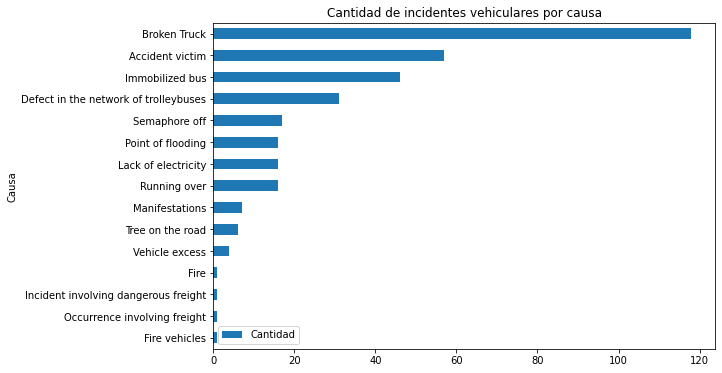

In [ ]:
df_c.set_index('Causa').sort_values(by=['Cantidad'], ascending=True).plot.barh(title="Cantidad de incidentes vehiculares por causa", figsize = (9, 6))

In [ ]:
df = df_base.copy()

## Añadiendo 2 columnas

In [ ]:
prueba = df
horas = {1:'7:00', 2:'7:30', 3:'8:00', 4:'8:30', 5:'9:00', 6:'9:30', 7:'10:00',
         8:'10:30', 9:'11:00', 10:'11:30', 11:'12:00', 12:'12:30', 13:'13:00', 14:'13:30',
         15:'14:00', 16:'14:30', 17:'15:00', 18:'15:30', 19:'16:00', 20:'16:30', 21:'17:00',
         22:'17:30', 23:'16:00', 24:'16:30', 25:'17:00', 26:'17:30', 27:'18:00'}

prueba['Hora'] = prueba['Hour (Coded)'].replace(horas)
prueba.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%),Hora
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,7:00
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6,7:30
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,8:00
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2,8:30
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1,9:00


In [ ]:
prueba['Dia'] = prueba['Hour (Coded)']

In [ ]:
prueba['Dia'][1]

2

In [ ]:
contador=0
dias = ['Lunes','Martes','Miércoles','Jueves','Viernes']
for i in prueba['Dia']:
  contador+=1
  for j in dias:
    prueba['Dia'][i] = prueba['Dia'][i].replace(j)
    print(i)
    break

print(contador)

In [ ]:
prueba['Dia'].head()

0    1
1    2
2    3
3    4
4    5
Name: Dia, dtype: int64

In [ ]:
contador = 1
for i in dias:
  for j in prueba['Dia']:
    while j%28 != 0:
      #contador+=1
      #prueba['Dia'][j] = i
      print(j)

print(contador)
#prueba['Dia'].head()

In [ ]:
contador = 1
for i in dias:
  contador+=1
  while prueba['Dia'][contador] % 28 != 0:
    print(i)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lunes
Lun

KeyboardInterrupt: ignored

## Categorización de variables

In [ ]:
#Definición de los límites
lentitud = [-math.inf,7,14,math.inf]
#Definición de las categorías
categoria = ['*','* *','* * *']

#Implementación de una nueva columna que clasificará la lentitud del tráfico
df['Lentitud del tráfico'] = pd.cut(x=df['Slowness in traffic (%)'].astype(float), bins = lentitud, labels = categoria)

In [ ]:
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%),Lentitud del tráfico
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,*
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6,*
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,* *
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2,* *
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1,* *


In [ ]:
df['Lentitud del tráfico'].value_counts()

* *      81
*        33
* * *    21
Name: Lentitud del tráfico, dtype: int64

## Seleccionando datos de entrenamiento y prueba

In [ ]:
#Seleccionando los datos
datos2 = df

#Cambiar de variable categórica a numérica
slow = {'*':1, '* *':2, '* * *':3}
datos2['Lentitud del tráfico'] = datos2['Lentitud del tráfico'].map(slow)

In [ ]:
X = datos2.iloc[:,:-2] #Captando las variables independientes
Y = datos2.iloc[:,-1] #Captando la variable dependiente "Lentitud del tráfico"

In [ ]:
print(X.shape)
print(Y.shape)

(135, 17)
(135,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0,stratify=Y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(94, 17)
(41, 17)
(94,)
(41,)


In [ ]:
y_train.value_counts(normalize= True)

2    0.595745
1    0.244681
3    0.159574
Name: Lentitud del tráfico, dtype: float64

In [ ]:
y_test.value_counts(normalize= True)

2    0.609756
1    0.243902
3    0.146341
Name: Lentitud del tráfico, dtype: float64

## Logit

In [ ]:
logit_model = LogisticRegression(max_iter=350)

In [ ]:
logit_model.fit(x_train, y_train)

LogisticRegression(max_iter=350)

In [ ]:
predict_train = logit_model.predict(x_train)
predict_test = logit_model.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_train,predict_train))
print(metrics.accuracy_score(y_test,predict_test))

0.8085106382978723
0.5609756097560976


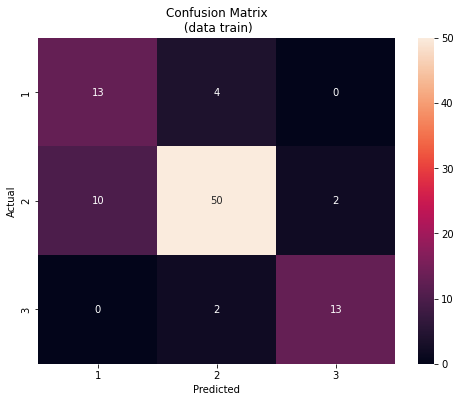

In [ ]:
confusion_matrix = pd.crosstab(predict_train, y_train, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data train)")
plt.show()

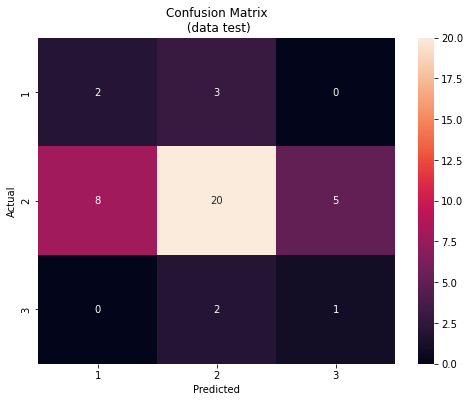

In [ ]:
confusion_matrix = pd.crosstab(predict_test, y_test, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

In [ ]:
## Método de elección de variables
rfe = RFE(estimator= LogisticRegression(max_iter=350), n_features_to_select=20)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(max_iter=350), n_features_to_select=20)

In [ ]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
x_train2 = x_train.loc[:,rfe.support_.tolist()]
x_test2 = x_test.loc[:,rfe.support_.tolist()]

In [ ]:
logit_model = LogisticRegression(max_iter=350, C = 0.01)

In [ ]:
logit_model.fit(x_train2,y_train)

LogisticRegression(C=0.01, max_iter=350)

In [ ]:
predict_train2 = logit_model.predict(x_train2)
predict_test2 = logit_model.predict(x_test2)

In [ ]:
print(metrics.accuracy_score(y_train,predict_train2))
print(metrics.accuracy_score(y_test,predict_test2))

0.7553191489361702
0.6829268292682927


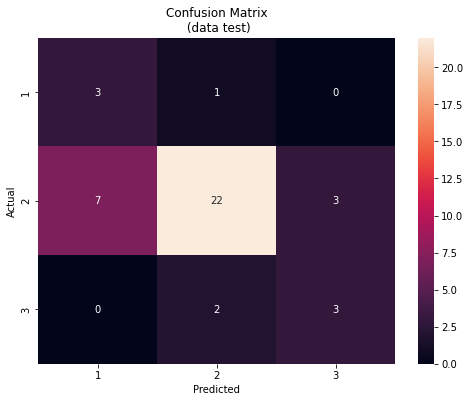

In [ ]:
confusion_matrix = pd.crosstab(predict_test2, y_test, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

In [ ]:
## coeficientes del modelo logit

logit_model.coef_

array([[-1.73318647e-01, -2.18311239e-02, -3.49035437e-02,
         1.58145495e-03,  2.03508201e-02, -5.19101054e-03,
        -2.70373297e-04, -1.56450715e-03, -1.95806885e-03,
        -5.95897174e-04,  0.00000000e+00, -4.00000705e-03,
        -4.25374921e-03,  3.81197047e-02,  8.81322562e-03,
        -5.76774010e-03,  9.84357037e-03],
       [-4.23351113e-02,  1.92106520e-02,  4.36524291e-02,
        -1.26949050e-03, -2.60833088e-02,  9.39305838e-03,
        -4.45504560e-03,  2.24792729e-03,  2.33648474e-03,
        -3.62276913e-02,  0.00000000e+00, -4.03177599e-02,
         1.96041241e-03, -3.93172602e-02, -1.73742073e-03,
        -3.69052298e-02, -9.79563528e-03],
       [ 2.15653758e-01,  2.62047188e-03, -8.74888540e-03,
        -3.11964444e-04,  5.73248873e-03, -4.20204785e-03,
         4.72541890e-03, -6.83420140e-04, -3.78415891e-04,
         3.68235884e-02,  0.00000000e+00,  4.43177670e-02,
         2.29333680e-03,  1.19755547e-03, -7.07580489e-03,
         4.26729699e-02, -4.7

In [ ]:
x_train2.columns

Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore'],
      dtype='object')

In [ ]:
## validación cruzada
logit_model = LogisticRegression(max_iter=350)
cv = KFold(n_splits = 10, shuffle = True, random_state= 25)
cv2 = RepeatedKFold(n_splits=5, n_repeats=5, random_state=25)
scores = cross_val_score(logit_model,x_train2,y_train,scoring="accuracy",cv = cv2, n_jobs= 1)


scores

array([0.63157895, 0.63157895, 0.57894737, 0.73684211, 0.83333333,
       0.63157895, 0.78947368, 0.57894737, 0.57894737, 0.72222222,
       0.68421053, 0.57894737, 0.57894737, 0.63157895, 0.77777778,
       0.42105263, 0.63157895, 0.73684211, 0.78947368, 0.61111111,
       0.68421053, 0.73684211, 0.73684211, 0.63157895, 0.66666667])

In [ ]:
print("Medida de validación cruzada: ", scores.mean())

Medida de validación cruzada:  0.6644444444444444


In [ ]:
classifier = XGBClassifier( )
classifier.fit(x_train.values, y_train.values)

XGBClassifier(objective='multi:softprob')

In [ ]:
for i,j in zip(x_train.columns,classifier.feature_importances_):
    print(i, ": ",j)

Hour (Coded) :  0.25753582
Immobilized bus :  0.0859562
Broken Truck :  0.08759663
Vehicle excess :  0.0
Accident victim :  0.081592366
Running over :  0.12348621
Fire vehicles :  0.0
Occurrence involving freight :  0.0
Incident involving dangerous freight :  0.0
Lack of electricity :  0.056451768
Fire :  0.0
Point of flooding :  0.13447982
Manifestations :  0.0
Defect in the network of trolleybuses :  0.049971685
Tree on the road :  0.0
Semaphore off :  0.122929566
Intermittent Semaphore :  0.0


In [ ]:
importancia =pd.DataFrame(data = {
                "Causa": x_train.columns,
                "Importancia": classifier.feature_importances_
            }).sort_values("Importancia", ascending= False)

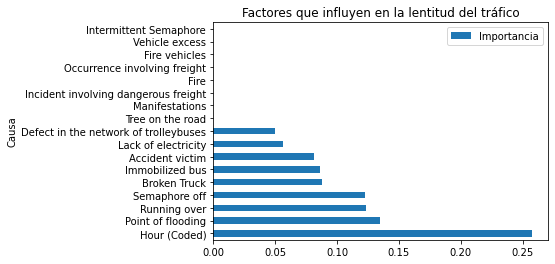

In [ ]:
importancia.set_index('Causa').plot.barh(title='Factores que influyen en la lentitud del tráfico')